# Kalman Filter Basics

* referências:
    * https://medium.com/analytics-vidhya/kalman-filters-a-step-by-step-implementation-guide-in-python-91e7e123b968
    * https://scipy-cookbook.readthedocs.io/items/KalmanFiltering.html

In [286]:
from math import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import numpy as np

## Gaussian Function

In [287]:
def f(mu, sigma2, x):
    coefficient = 1.0 / sqrt(2.0 * pi * sigma2)
    exponential = exp(-0.5 * (x-mu) ** 2 / sigma2)
    return coefficient * exponential

f(10., 4., 8.)

0.12098536225957168

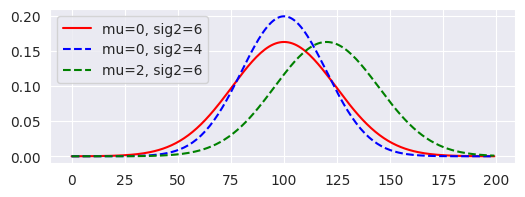

In [288]:
# plot gaussian
gauss = []
gauss2 = []
gauss3 = []
# figure small
fig, ax = plt.subplots(figsize=(6, 2))
for x in np.arange(-10, 10, 0.1):
    gauss.append(f(mu=0, sigma2=6, x=x))
    gauss2.append(f(mu=0, sigma2=4, x=x))
    gauss3.append(f(mu=2, sigma2=6, x=x))
ax.plot(gauss, color='r', label='mu=0, sig2=6', linestyle='-')
ax.plot(gauss2, color='b', label='mu=0, sig2=4', linestyle='--')
ax.plot(gauss3, color='g', label='mu=2, sig2=6', linestyle='--')
plt.legend()
plt.show()

* gaussian motion (update):
    * fusion of two gaussian functions (usually one is the prior and the other is the measurement)
    * mean: $\mu' = \frac{\sigma_2^2 \mu_1 + \sigma_1^2 \mu_2}{\sigma_1^2 + \sigma_2^2}$
    * variance: $\sigma'^2 = \frac{1}{\frac{1}{\sigma_1^2} + \frac{1}{\sigma_2^2}}$

In [289]:
def update(mean1, var1, mean2, var2):
    new_mean = (var2 * mean1 + var1 * mean2) / (var2 + var1)
    new_var = 1 / (1 / var2 + 1 / var1)
    return [new_mean, new_var]

[1.0, 3.0]


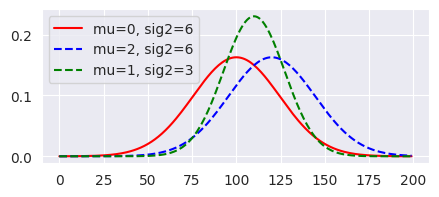

In [290]:
# plot gaussian and 2 updated gaussian in the same plot with the shifts
# using the update function (fusion of function 1 and function 2)
fig, ax = plt.subplots(figsize=(5, 2))

gauss1 = [f(0, 6, x) for x in np.arange(-10, 10, 0.1)] # compact notation
gauss2 = [f(2, 6, x) for x in np.arange(-10, 10, 0.1)]

ax.plot(gauss1, color='r', label='mu=0, sig2=6', linestyle='-')
ax.plot(gauss2, color='b', label='mu=2, sig2=6', linestyle='--')

# update
updated = update(0, 6, 2, 6)
print(updated)
gauss3 = [f(updated[0], updated[1], x) for x in np.arange(-10, 10, 0.1)]

ax.plot(gauss3, color='g', label='mu=1, sig2=3', linestyle='--')
plt.legend()
plt.show()



[0.0, 2.4000000000000004]


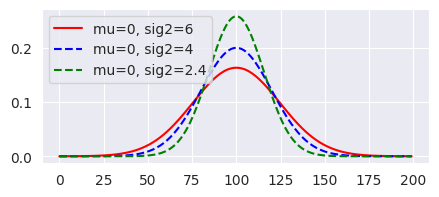

In [291]:
# figure small
fig, ax = plt.subplots(figsize=(5, 2))

gauss1 = [f(0, 6, x) for x in np.arange(-10, 10, 0.1)] # compact notation
gauss2 = [f(0, 4, x) for x in np.arange(-10, 10, 0.1)]

ax.plot(gauss1, color='r', label='mu=0, sig2=6', linestyle='-')
ax.plot(gauss2, color='b', label='mu=0, sig2=4', linestyle='--')

# update
updated = update(0, 6, 0, 4)
print(updated)
gauss3 = [f(updated[0], updated[1], x) for x in np.arange(-10, 10, 0.1)]

ax.plot(gauss3, color='g', label='mu=0, sig2=2.4', linestyle='--')
plt.legend()
plt.show()

In [292]:
def predict(mean1, var1, mean2, var2):
    new_mean = mean1 + mean2
    new_var = var1 + var2
    return [new_mean, new_var]

[2, 12]


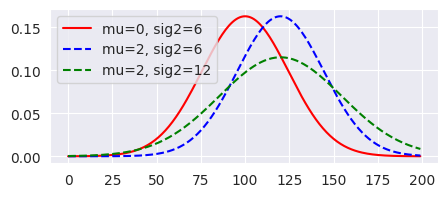

In [293]:
# plot gaussian and 2 updated gaussian in the same plot with the shifts
# using the update function (fusion of function 1 and function 2)
fig, ax = plt.subplots(figsize=(5, 2))

gauss1 = [f(0, 6, x) for x in np.arange(-10, 10, 0.1)] # compact notation
gauss2 = [f(2, 6, x) for x in np.arange(-10, 10, 0.1)]

ax.plot(gauss1, color='r', label='mu=0, sig2=6', linestyle='-')
ax.plot(gauss2, color='b', label='mu=2, sig2=6', linestyle='--')

# update
predicted = predict(0, 6, 2, 6)
print(predicted)
gauss3 = [f(predicted[0], predicted[1], x) for x in np.arange(-10, 10, 0.1)]

ax.plot(gauss3, color='g', label='mu=2, sig2=12', linestyle='--')
plt.legend()
plt.show()


## The kalman Filter

Update: [5.00, 4.00]
Predict: [6.00, 6.00]
Update: [6.00, 2.40]
Predict: [7.00, 4.40]
Update: [7.00, 2.10]
Predict: [9.00, 4.10]
Update: [9.00, 2.02]
Predict: [10.00, 4.02]
Update: [10.00, 2.01]
Predict: [11.00, 4.01]

Final result: [11.00, 4.01]


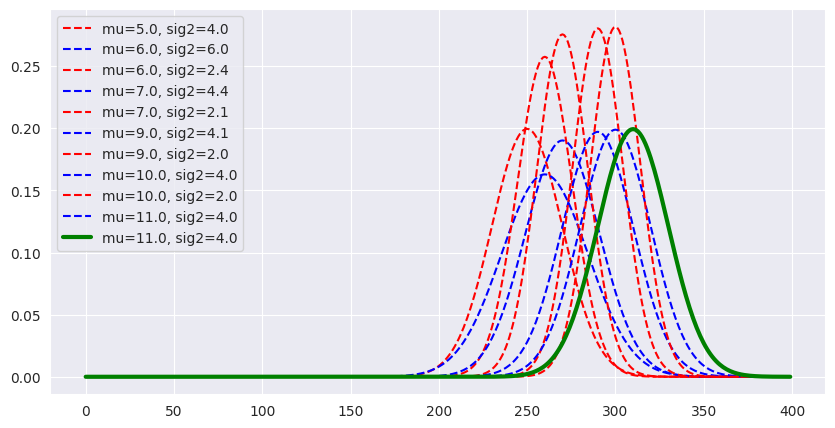

In [294]:
# measurements for mu and motions, U
measurements = [5., 6., 7., 9., 10.]
motions = [1., 1., 2., 1., 1.]

# initial parameters
measurement_sig = 4.
motion_sig = 2.
mu0 = 0.
sig0 = 10000.

mu = mu0
sig = sig0
updated_list = []
predicted_list = []
## TODO: Loop through all measurements/motions
# this code assumes measurements and motions have the same length
# so their updates can be performed in pairs
for n in range(len(measurements)):
    # measurement update, with uncertainty
    mu, sig = update(mu, sig, measurements[n], measurement_sig)
    updated_list.append([mu, sig])
    print(f'Update: [{mu:.2f}, {sig:.2f}]')
    # motion update, with uncertainty
    mu, sig = predict(mu, sig, motions[n], motion_sig)
    predicted_list.append([mu, sig])
    print(f'Predict: [{mu:.2f}, {sig:.2f}]')


    
# print the final, resultant mu, sig
print(f'\nFinal result: [{mu:.2f}, {sig:.2f}]')

fig, ax = plt.subplots(figsize=(10, 5))

for n in range(len(measurements)):
    gauss1 = [f(updated_list[n][0], updated_list[n][1], x) for x in np.arange(-20, 20, 0.1)] 
    gauss2 = [f(predicted_list[n][0], predicted_list[n][1], x) for x in np.arange(-20, 20, 0.1)]
    ax.plot(gauss1, color='r', label=f'mu={updated_list[n][0]:.1f}, sig2={updated_list[n][1]:.1f}', linestyle='--')
    ax.plot(gauss2, color='b', label=f'mu={predicted_list[n][0]:.1f}, sig2={predicted_list[n][1]:.1f}', linestyle='--')

final_gauss = [f(mu, sig, x) for x in np.arange(-20, 20, 0.1)] 
ax.plot(final_gauss, color='g', label=f'mu={mu:.1f}, sig2={sig:.1f}', linestyle='-', linewidth=3)
plt.legend()
plt.show()

## Kalman filtering

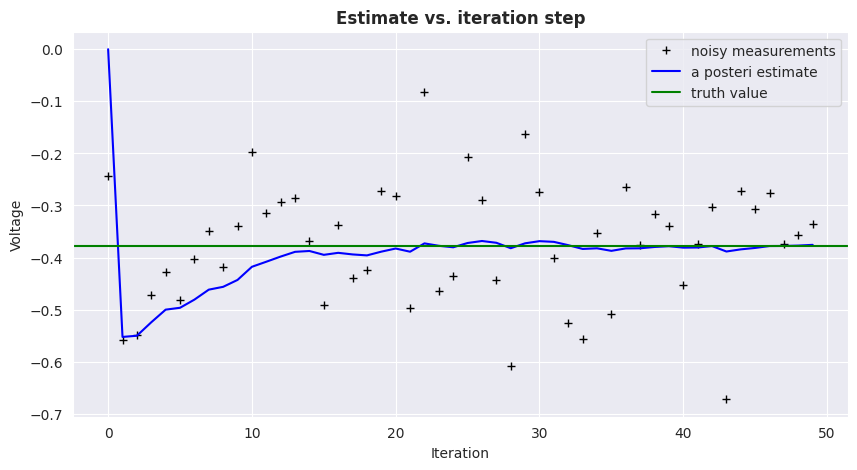

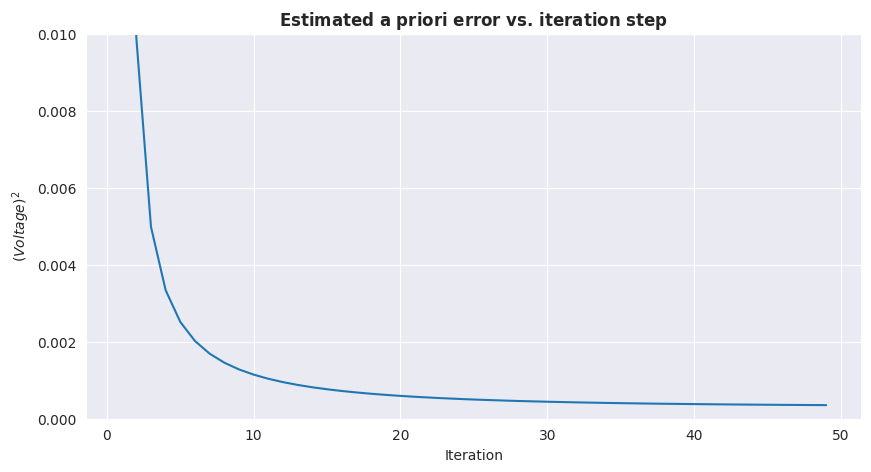

In [296]:
plt.rcParams['figure.figsize'] = (10, 5)

# intial parameters
n_iter = 50
sz = (n_iter,) # size of array
x = -0.37727 # truth value (typo in example at top of p. 13 calls this z)
z = np.random.normal(x,0.1,size=sz) # observations (normal about x, sigma=0.1)

Q = 1e-5 # process variance

# allocate space for arrays
xhat=np.zeros(sz)      # a posteri estimate of x
P=np.zeros(sz)         # a posteri error estimate
xhatminus=np.zeros(sz) # a priori estimate of x
Pminus=np.zeros(sz)    # a priori error estimate
K=np.zeros(sz)         # gain or blending factor

R = 0.1**2 # estimate of measurement variance, change to see effect

# intial guesses
xhat[0] = 0.0
P[0] = 1.0

for k in range(1,n_iter):
    # time update
    xhatminus[k] = xhat[k-1]
    Pminus[k] = P[k-1]+Q

    # measurement update
    K[k] = Pminus[k]/( Pminus[k]+R )
    xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k])
    P[k] = (1-K[k])*Pminus[k]

plt.figure()
plt.plot(z,'k+',label='noisy measurements')
plt.plot(xhat,'b-',label='a posteri estimate')
plt.axhline(x,color='g',label='truth value')
plt.legend()
plt.title('Estimate vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('Voltage')

plt.figure()
valid_iter = range(1,n_iter) # Pminus not valid at step 0
plt.plot(valid_iter,Pminus[valid_iter],label='a priori error estimate')
plt.title('Estimated $\it{\mathbf{a \ priori}}$ error vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('$(Voltage)^2$')
plt.setp(plt.gca(),'ylim',[0,.01])
plt.show()